In [ ]:
import ast
import numpy as np
import time
import sys
import pandas as pd
import subprocess
import pickle
import random as rand
import matplotlib.pyplot as plt
import seaborn as sns
import time
import math
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.metrics import roc_auc_score
sns.set()
%config InlineBackend.figure_format='retina'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Google Colab
%cd "drive/My Drive/internship-2020"

### Data Loading

In [ ]:
from data_processing import split, loader_builder
from inv16_data_loading import km_normed_1, inv_16

train_set, valid_set, test_set, train_label, valid_label, test_label = split(km_normed_1, inv_16, os=True)
train_loader, valid_loader, test_loader = loader_builder(train_set, valid_set, test_set, train_label, valid_label, test_label)

### Data Visualisation

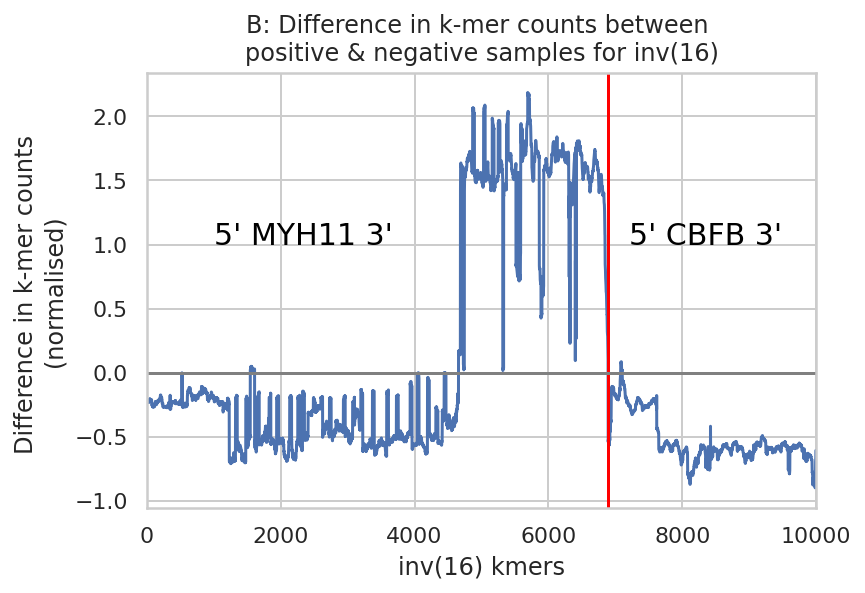

In [ ]:
# Difference in means per kmer between positive and negative examples
diff_pos_neg = np.mean(positives, axis=0) - np.mean(negatives, axis=0)
sns.set_style("whitegrid")
plt.plot(diff_pos_neg)
plt.title("B: Difference in k-mer counts between \npositive & negative samples for inv(16)")
plt.axvline(6891, color='red') # Separation between myh11 and cbfb kmers
plt.axhline(0, color='gray')
plt.xlabel("inv(16) kmers")
plt.ylabel("Difference in k-mer counts \n(normalised)")
plt.xlim(0,10000)
ax = plt.gca()
style = dict(size=15, color='black')
ax.text(1000, 1, "5' MYH11 3'", **style)
ax.text(7200, 1, "5' CBFB 3'", **style)
plt.show()
# plt.plot(diff_pos_neg[6891:])
# plt.title("cbfb kmers only")
# plt.show()

### PyTorch Model

In [ ]:
from pyt_model import *

input_size = km_normed_1.shape[1]
model = define_model(input_size)
t_losses, v_losses = train_model(model, 100, [train_loader, valid_loader, test_loader], 'inv16')
eval_model('inv16', 'final', test_loader, input_size)
eval_model('inv16', 'best', test_loader, input_size)

# Validation graph
plt.plot(t_losses)
plt.plot(v_losses)
plt.ylim(0,1)
plt.show()